# เรียน Py-ART Basics ใช้ข้อมูลกรมอุตุฯ 

แหล่งที่มา https://github.com/openradar/ams-open-radar-2023/blob/main/notebooks/pyart/pyart-basics.ipynb

สามารถเรียนจากแหล่งอื่นๆ ได้จากลิงก์นี้ https://arm-doe.github.io/pyart/


In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


import pyart
from pyart.testing import get_test_data

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


## อ่านข้อมูลด้วย Py-ART

### อ่านข้อมูลโดยใช้ pyart.io.read

In [3]:
#อ่านการใช้งาน
pyart.io.read?

Signature: pyart.io.read(filename, use_rsl=False, **kwargs)
Docstring:
Read a radar file and return a radar object.

Additional parameters are passed to the underlying read_* function.

Parameters
----------
filename : str
    Name of radar file to read.
use_rsl : bool
    True will use the TRMM RSL library to read files which are supported
    both natively and by RSL. False will choose the native read function.
    RSL will always be used to read a file if it is not supported
    natively.

Other Parameters
-------------------
field_names : dict, optional
    Dictionary mapping file data type names to radar field names. If a
    data type found in the file does not appear in this dictionary or has
    a value of None it will not be placed in the radar.fields dictionary.
    A value of None, the default, will use the mapping defined in the
    metadata configuration file.
additional_metadata : dict of dicts, optional
    Dictionary of dictionaries to retrieve metadata from during this

อ่านเรดาร์เข้ามาเก็บไว้ในอ๊อปเจกค์ pyart

In [4]:
file = "../1data/0radar/1radar_tmd/PHS240@201807201000.uf.bz2"
radar = pyart.io.read(file)
radar

### ตรวจสอบ pyart.Radar object

มีฟิวด์อะไรบ้าง และคีย์อะไรบ้าง

In [5]:
radar.fields.keys()

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio'])

In [6]:
reflectivity = radar.fields['reflectivity']['data']
print(type(reflectivity), reflectivity)

<class 'numpy.ma.core.MaskedArray'> [[35.0 31.5 49.5 ... -- -- --]
 [33.0 49.5 36.5 ... -- -- --]
 [38.5 53.0 40.0 ... -- -- --]
 ...
 [35.5 3.0 11.0 ... -- -- --]
 [35.5 4.0 2.5 ... -- -- --]
 [33.5 2.0 2.5 ... -- -- --]]


ดูขนาดของอาเรย์

In [7]:
reflectivity.shape

(1924, 240)

เป็น numpy array แบบสองมิติ มีจำนวน 1924 แถว (Rays แนวเส้นที่กวาดในแต่ละมุมยก) และ 240 หลัก (Gates ความละเอียดตามแนวระยะ)
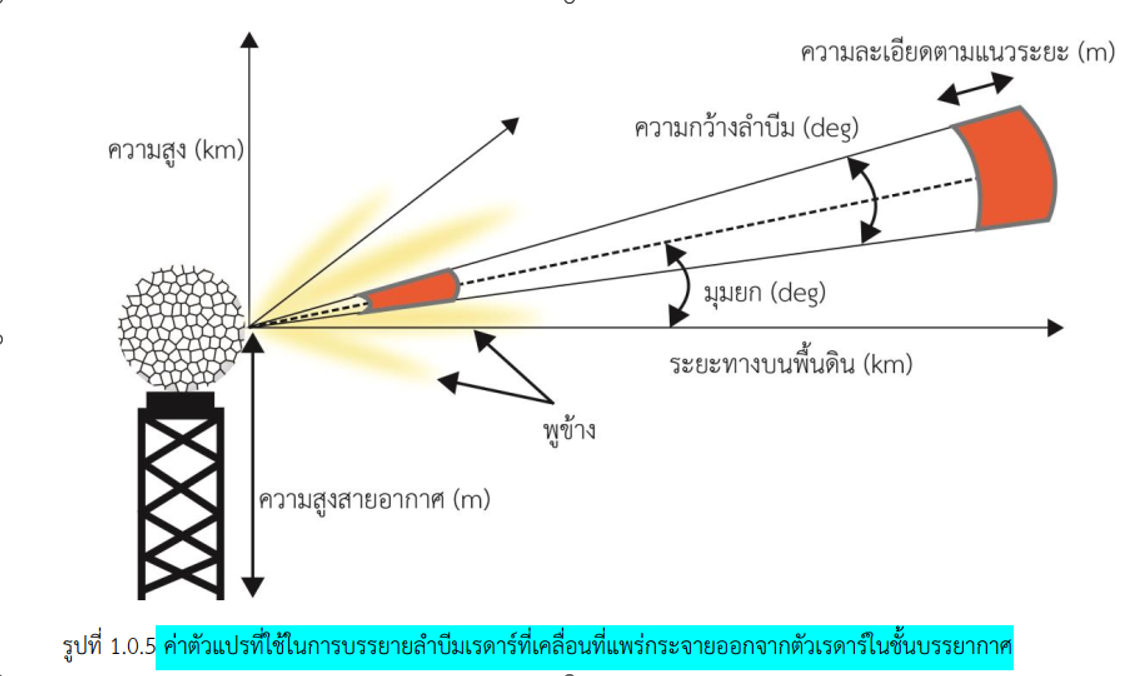

ภาพจาก : หนังสือเรดาร์ตรวจอากาศทางอุตุนิยมวิทยา

In [8]:
print(radar.nrays, radar.ngates)

1924 240


ตรวจสอบดูค่าการสะท้อน dBZ ตามแนวรัศมีที่เส้น 201 ระยะที่ 2

In [9]:
print(reflectivity[201, 2])

30.0


ดูรายละเอียดฟิวด์ คีย์และข้อมูล (data) ที่เก็บไว้ในแต่ละฟิวด์ของเรดาร์

In [10]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1924,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (1924,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	reflectivity:
		data: <ndarray of type: float64 and shape: (1924, 240)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Reflectivity
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	velocity:
		data: <ndarray of type: float64 and shape: (1924, 240)>
		units: meters_p

ดูความสูง

In [11]:
radar.altitude['data']

array([72.])

ดูค่าพิกัดภูมิศาสตร์

In [12]:
print('lat: ',radar.latitude['data'][0])
print('lon: ',radar.longitude['data'][0])

lat:  16.775407986111112
lon:  100.21796440972223


In [13]:
radar.nsweeps

4

In [14]:
print('จำนวนระยะในแต่ละมุมยก: ',radar.ngates)
print('จำนวนเส้นที่กวาดทุกมุมยก: ', radar.nrays)
print('จำนวนมุมยก: ', radar.nsweeps)
print('ค่ามุมยก: ', radar.fixed_angle['data']) 
print('เวลาที่เริ่มกวาด: ', radar.time['units'])
     
#หากต้องการจะทราบชื่อเรดาร์ต้องเข้าคีย์ไหน
#หากต้องการทราบความกว้างมุมในแนวราบของการกวาดต้องเข้าคีย์ไหน radar_beam_width_h
#frequency? 

จำนวนระยะในแต่ละมุมยก:  240
จำนวนเส้นที่กวาดทุกมุมยก:  1924
จำนวนมุมยก:  4
ค่ามุมยก:  [0.484375 1.484375 2.390625 3.390625]
เวลาที่เริ่มกวาด:  seconds since 2018-07-20T10:00:03Z


## พลอตข้อมูลเรดาร์ในรูปแบบแผนที่

### คำาสั่งพื้นฐานในการพลอตภาพ
ใน Py-ART มี 4 คลาสหลักที่ใช้ในการพลอตภาพใน pyart.graph:

* RadarDisplay
* RadarMapDisplay
* AirborneRadarDisplay

การพลอตแบบกริด
* GridMapDisplay

### พลอตโดย RadarMapDisplay 

ยังไม่มีอะไร

In [15]:
fig = plt.figure(figsize=[10, 10])

<Figure size 1000x1000 with 0 Axes>

In [16]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

เรียกคำสั่งพลอตภาพแบบ ppi

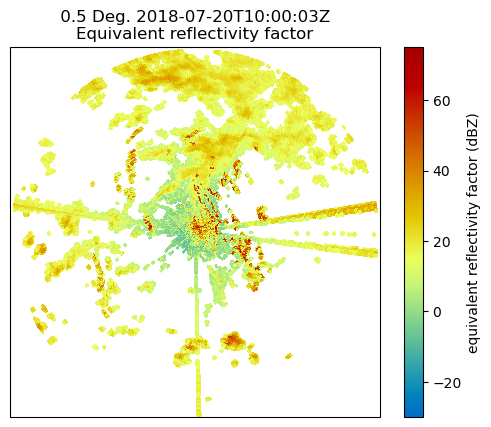

In [17]:
display.plot_ppi_map('reflectivity')

ทดลองเปลี่ยนค่าต่าง ๆ 

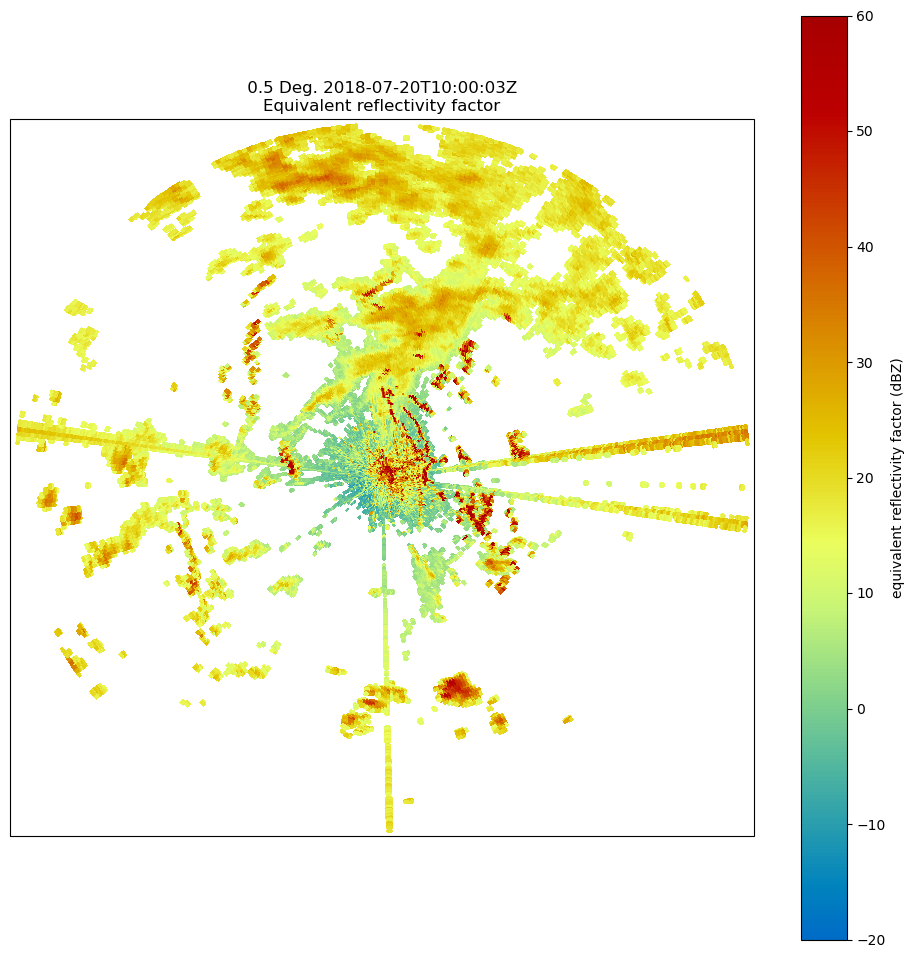

In [18]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=0, # เปลี่ยนค่ามุมยก
                     vmin=-20, #ค่าต่ำสุด
                     vmax=60, #สูงสุด
                     projection=ccrs.PlateCarree(),
                     cmap='pyart_HomeyerRainbow')
plt.show()

อ่านวิธีการใช้งานคำสั่งพลอตแบบ ppi

In [19]:
display.plot_ppi_map?

Signature:
display.plot_ppi_map(
    field,
    sweep=0,
    mask_tuple=None,
    vmin=None,
    vmax=None,
    cmap=None,
    norm=None,
    mask_outside=False,
    title=None,
    title_flag=True,
    colorbar_flag=True,
    colorbar_label=None,
    ax=None,
    fig=None,
    lat_lines=None,
    lon_lines=None,
    projection=None,
    min_lon=None,
    max_lon=None,
    min_lat=None,
    max_lat=None,
    width=None,
    height=None,
    lon_0=None,
    lat_0=None,
    resolution='110m',
    shapefile=None,
    shapefile_kwargs=None,
    edges=True,
    gatefilter=None,
    filter_transitions=True,
    embellish=True,
    raster=False,
    ticks=None,
    ticklabs=None,
    alpha=None,
    edgecolors='face',
    **kwargs,
)
Docstring:
Plot a PPI volume sweep onto a geographic map.

Parameters
----------
field : str
    Field to plot.
sweep : int, optional
    Sweep number to plot.

Other Parameters
----------------
mask_tuple : (str, float)
    Tuple containing the field name and va

เปลี่ยนค่า colormap

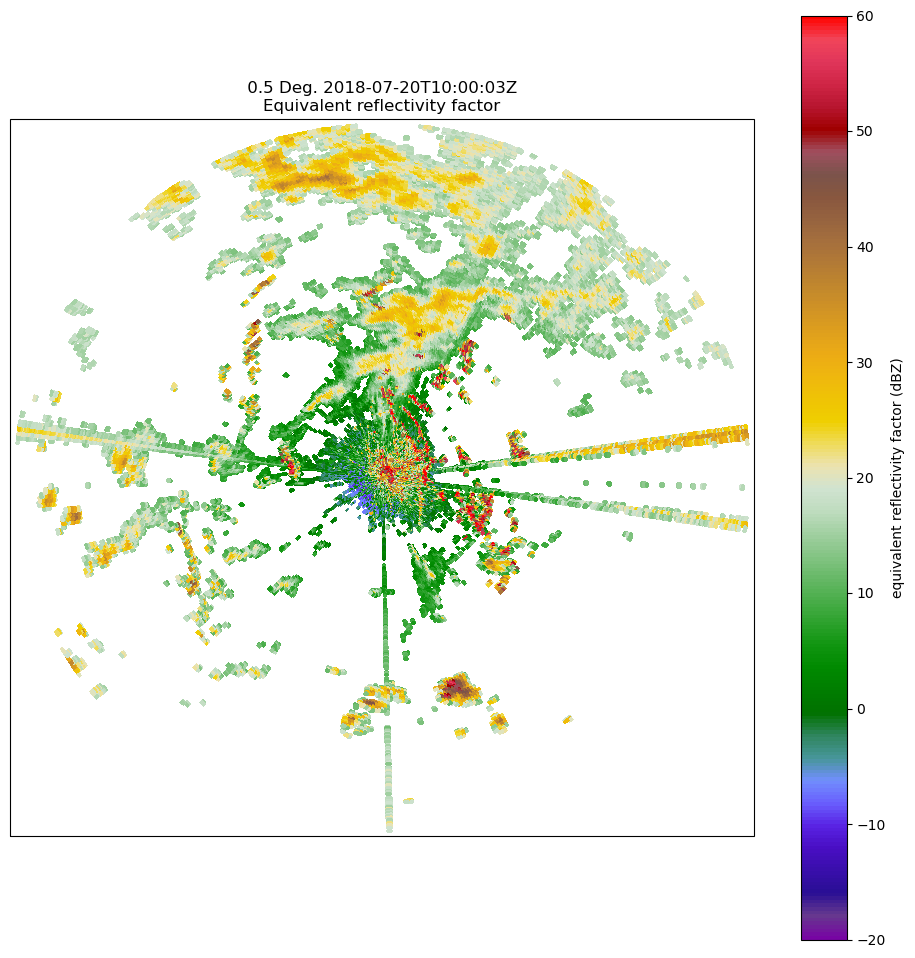

In [20]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=0,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree(),
                     cmap='pyart_Carbone42') # ตรงนี้
plt.show()

เปลี่ยนมุม 

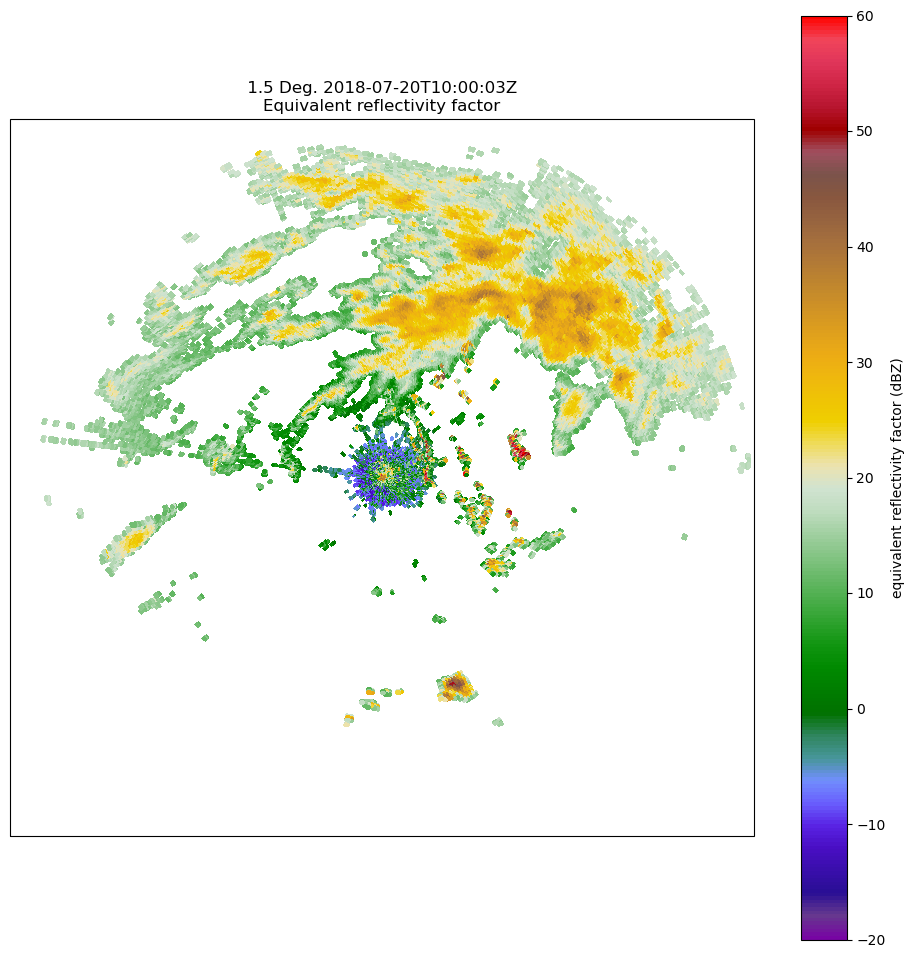

In [21]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=1, # เปลี่ยนมุมดูบ้าง
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree(),
                     cmap='pyart_Carbone42')
plt.show()

ดูฟิวด์อื่นดูบ้าง

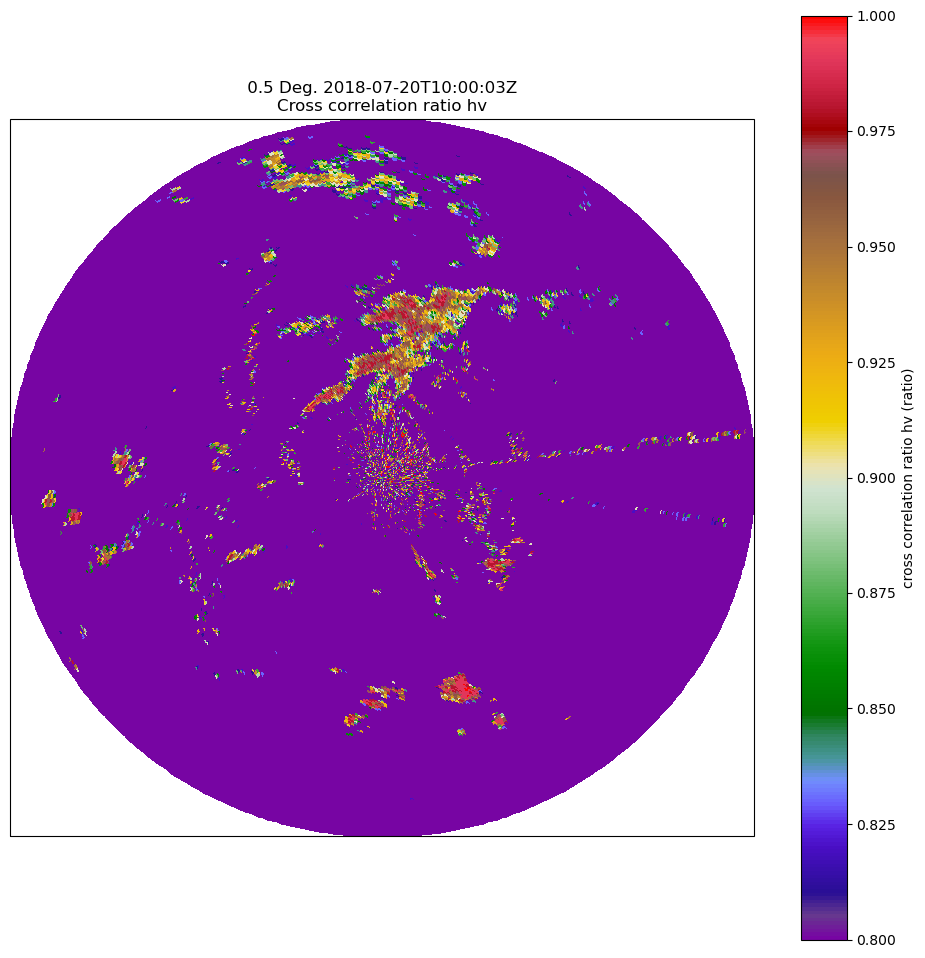

In [22]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('cross_correlation_ratio', ## เปลี่ยนตรงนี้
                     sweep=0,
                     vmin=0.8,
                     vmax=1.,
                     projection=ccrs.PlateCarree(),
                     cmap='pyart_Carbone42')
plt.show()

## ทดลองข้อมูลช่วงเวลาอื่น ๆ 
* ของ TMD เช่น file = "../1data/0radar/1radar_tmd/PHS240@201807201100.uf.bz2"
* ของกรมฝนหลวง  เช่น file = "../1data/0radar/2radar_royalrain/20230916170602.uf.gz"